In [196]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#temporarily block warnings
import warnings
warnings.filterwarnings('ignore')

In [197]:
house_data = pd.read_csv('apartments_pl_2023_08.csv')

# Table of Contents

- [1. Data overview and cleaning](#data-overview-and-cleaning)
  - [1.1 Looking for Abnormalities in the Data](#looking-for-abnormalities)
- [2. Decision tree and Random Forest](#random-forest)
- [3. Conclusions](#conclusions)

<a id="data-cleaning"></a>

# 1. Data overview and cleaning

In [198]:
house_data.describe()

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,price
count,18905.000000,18905.000000,15467.000000,18643.000000,15634.000000,18905.000000,18905.000000,18905.000000,18905.000000,18891.000000,18817.000000,18880.000000,18892.000000,18847.000000,18340.000000,18878.000000,1.890500e+04
mean,58.509976,2.676752,3.339820,5.279783,1984.551043,52.020411,19.516394,4.398444,20.099656,0.414897,1.002196,0.518748,0.371033,0.356646,1.460047,0.364134,6.925592e+05
std,21.060168,0.903619,2.549141,3.333666,33.767929,1.353998,1.769053,2.857387,23.513874,0.472782,0.913721,0.506783,0.452338,0.475884,1.102847,0.469334,3.443890e+05
min,25.000000,1.000000,1.000000,1.000000,1850.000000,49.979110,14.447127,0.020000,0.000000,0.004000,0.005000,0.001000,0.004000,0.001000,0.006000,0.003000,1.500000e+05
25%,44.200000,2.000000,2.000000,3.000000,1967.000000,51.109100,18.536220,2.070000,7.000000,0.175000,0.367000,0.237000,0.158000,0.118500,0.592000,0.145000,4.588000e+05
50%,54.400000,3.000000,3.000000,4.000000,1990.000000,52.193604,19.908944,4.010000,13.000000,0.288000,0.700000,0.387000,0.264000,0.235000,1.140000,0.239000,6.200000e+05
75%,68.200000,3.000000,4.000000,6.000000,2014.000000,52.412561,20.992010,6.180000,23.000000,0.466500,1.286000,0.621000,0.415000,0.417000,2.107000,0.405000,8.300000e+05
max,150.000000,6.000000,29.000000,29.000000,2023.000000,54.583210,23.207128,16.940000,208.000000,4.818000,4.996000,4.967000,4.960000,4.985000,4.998000,4.992000,2.500000e+06


In [199]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18905 entries, 0 to 18904
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    18905 non-null  object 
 1   city                  18905 non-null  object 
 2   type                  14866 non-null  object 
 3   squareMeters          18905 non-null  float64
 4   rooms                 18905 non-null  float64
 5   floor                 15467 non-null  float64
 6   floorCount            18643 non-null  float64
 7   buildYear             15634 non-null  float64
 8   latitude              18905 non-null  float64
 9   longitude             18905 non-null  float64
 10  centreDistance        18905 non-null  float64
 11  poiCount              18905 non-null  float64
 12  schoolDistance        18891 non-null  float64
 13  clinicDistance        18817 non-null  float64
 14  postOfficeDistance    18880 non-null  float64
 15  kindergartenDistanc

In [200]:
house_data.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,f8524536d4b09a0c8ccc0197ec9d7bde,szczecin,blockOfFlats,63.00,3.0,4.0,10.0,1980.0,53.378933,14.625296,...,0.413,condominium,concreteSlab,NaN,yes,yes,yes,no,yes,415000
1,accbe77d4b360fea9735f138a50608dd,szczecin,blockOfFlats,36.00,2.0,8.0,10.0,NaN,53.442692,14.559690,...,0.205,cooperative,concreteSlab,NaN,no,yes,yes,no,yes,395995
2,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,...,0.280,condominium,brick,NaN,no,no,no,no,no,565000
3,0a68cd14c44ec5140143ece75d739535,szczecin,tenement,87.60,3.0,2.0,3.0,NaN,53.435100,14.532900,...,0.087,condominium,brick,NaN,yes,yes,no,no,yes,640000
4,f66320e153c2441edc0fe293b54c8aeb,szczecin,blockOfFlats,66.00,3.0,1.0,3.0,NaN,53.410278,14.503611,...,0.514,condominium,NaN,NaN,no,no,no,no,no,759000


In [201]:
house_data['type'].value_counts()

type
blockOfFlats         9089
tenement             2895
apartmentBuilding    2882
Name: count, dtype: int64

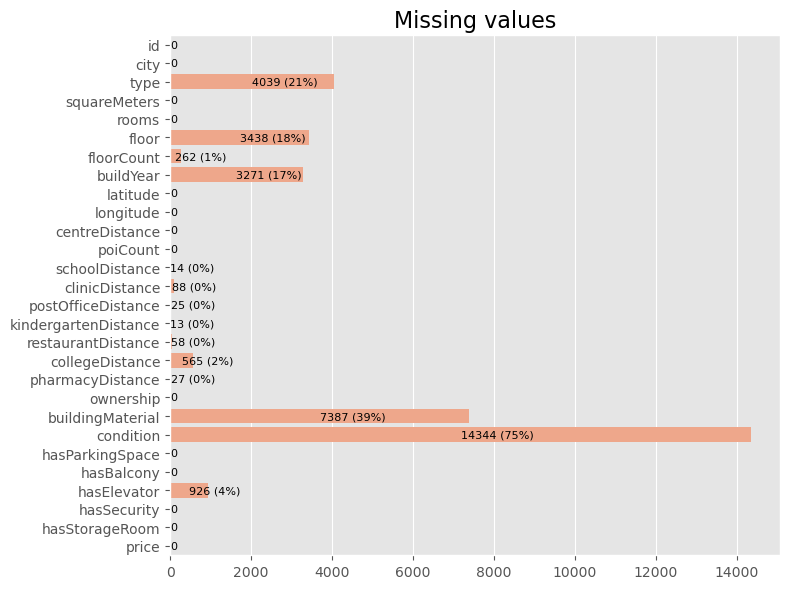

In [202]:
#plot missing values for each feature
plt.style.use('ggplot')

NA_values = house_data.isna().sum()

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=NA_values.values,y=NA_values.index,ax=ax,color='#FFA07A')

for i,value in zip(ax.patches,NA_values.values):
    if value>0:
        ax.text(i.get_x() + i.get_width()/2,i.get_y() + i.get_height()/2,
           f'{round(i.get_width())} ({int(i.get_width()/18905*100)}%)',ha='left',va='center',fontsize = 8)
    else:
        ax.text(i.get_x() + i.get_width()/2,i.get_y() + i.get_height()/2,
           f'{round(i.get_width())}',ha='left',va='center',fontsize = 8)

ax.set_title('Missing values',fontsize=16)
ax.set_ylabel('')


plt.tight_layout()
plt.show()

In [203]:
#drop 'condition' and 'building material' from the dataset (too many missing values)
columns_to_drop = ['buildingMaterial','condition']
house_data.drop(columns_to_drop,axis=1,inplace=True)

In [204]:
NA_values = house_data.isna().sum()
NA_values[NA_values>0].sort_values()

kindergartenDistance      13
schoolDistance            14
postOfficeDistance        25
pharmacyDistance          27
restaurantDistance        58
clinicDistance            88
floorCount               262
collegeDistance          565
hasElevator              926
buildYear               3271
floor                   3438
type                    4039
dtype: int64

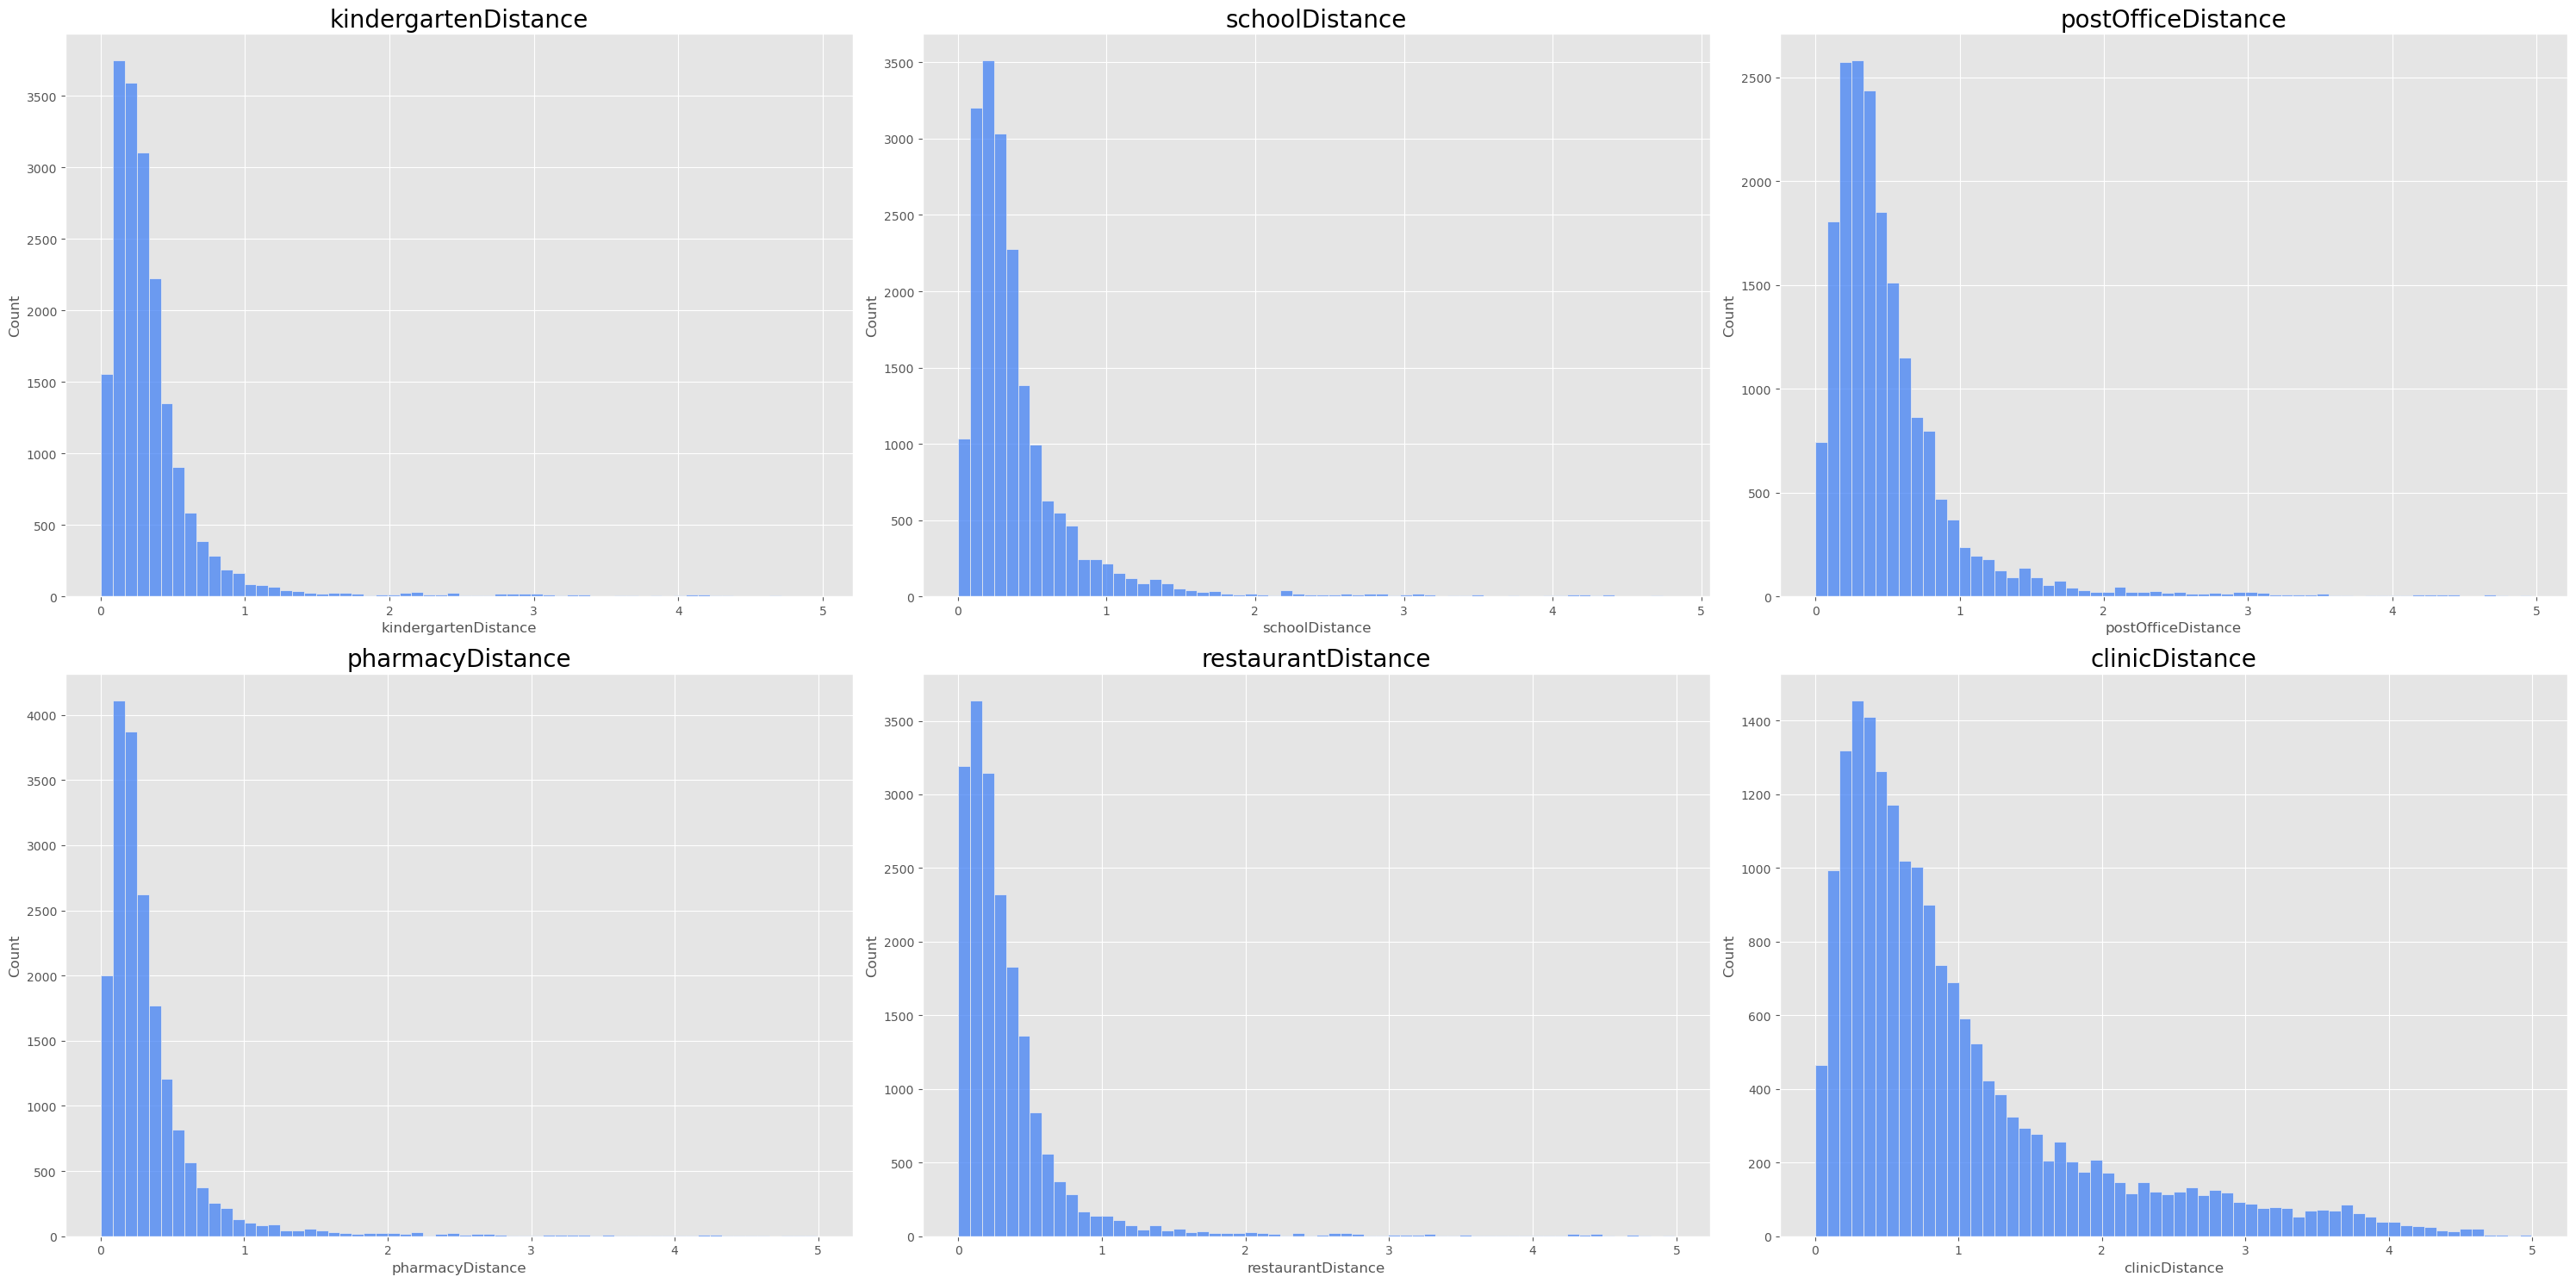

In [205]:
#first impute missing values in features with the least number of them

#check the distributions to decide wheter to use mean or median for filling
columns_dist = ['kindergartenDistance','schoolDistance','postOfficeDistance','pharmacyDistance','restaurantDistance','clinicDistance']
columns = house_data[columns_dist]

fig, ax = plt.subplots(2,3,figsize=(30,15))
ax = ax.flatten()

for i, feature in enumerate(columns):
    skewness = columns[feature].skew()
    sns.histplot(data=columns[feature],ax=ax[i],bins=60,color='#4281f5')
    ax[i].set_title(feature,fontsize=20)

plt.tight_layout()

In [206]:
house_data[columns_dist].skew()

kindergartenDistance    4.918238
schoolDistance          4.322157
postOfficeDistance      3.652134
pharmacyDistance        4.816876
restaurantDistance      4.769778
clinicDistance          1.615261
dtype: float64

We can see that all of these features are very rightly-skewed so the best way to impute the missing values is to use the median value.

In [207]:
#impute with median values
for i, feature in enumerate(columns):
    house_data[feature].fillna(house_data[feature].median(),inplace=True)

In [208]:
NA_values = house_data.isna().sum()
NA_values[NA_values>0].sort_values()

floorCount          262
collegeDistance     565
hasElevator         926
buildYear          3271
floor              3438
type               4039
dtype: int64

For 'floorCount' I am going to check the median number of floors in each of the three types of buildings and use those values.

For the rest I'm going to use an overall median value of floorCount.

In [209]:
groupby_floor_type = house_data.groupby('type')['floorCount'].median().reset_index()
groupby_floor_type

,type,floorCount
0,apartmentBuilding,5.0
1,blockOfFlats,4.0
2,tenement,4.0


In [210]:
#impute with median of each building type
for i in range(len(groupby_floor_type)):
    build_type = groupby_floor_type['type'].iloc[i]
    median_floor_count = groupby_floor_type['floorCount'].iloc[i]
    
    house_data.loc[house_data['type'] == build_type, 'floorCount'] = house_data.loc[house_data['type'] == build_type, 'floorCount'].fillna(median_floor_count)

In [211]:
#impute the rest with overall median
overall_median = house_data['floorCount'].median()
house_data['floorCount'].fillna(overall_median,inplace=True)

Text(0.5, 1.0, 'College distance histogram')

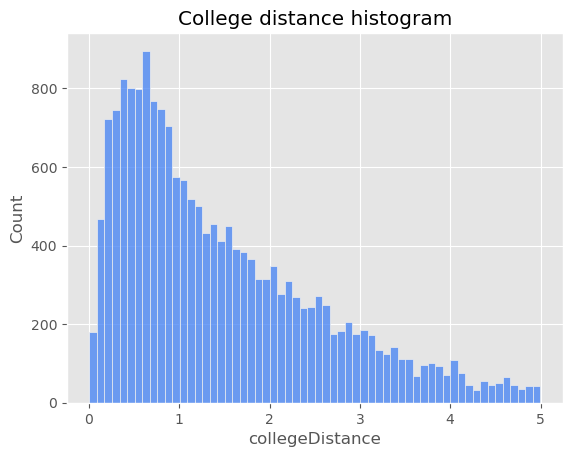

In [212]:
#check distribution of collegeDistance feature
sns.histplot(data=house_data['collegeDistance'],bins=60,color='#4281f5')
plt.title('College distance histogram')

College distance distribution is also rightly skewed so I'm going to use median value to fill the missing data.

In [213]:
#impute with median value
house_data['collegeDistance'].fillna(house_data['collegeDistance'].median(),inplace=True)

In [214]:
NA_values = house_data.isna().sum()
NA_values[NA_values>0].sort_values()

hasElevator     926
buildYear      3271
floor          3438
type           4039
dtype: int64

In [215]:
#convert has[feature] to binary
binary_columns = ['hasParkingSpace', 'hasBalcony', 'hasElevator', 'hasSecurity', 'hasStorageRoom']
house_data[binary_columns] = house_data[binary_columns].replace({'yes': 1, 'no': 0})

In [216]:
#impute `hasElevator`
from sklearn.impute import KNNImputer

imputer_elevator = KNNImputer(n_neighbors=5)
features_elevator = ['floorCount', 'hasParkingSpace', 'hasBalcony']
house_data[features_elevator + ['hasElevator']] = imputer_elevator.fit_transform(house_data[features_elevator + ['hasElevator']])
house_data['hasElevator'] = house_data['hasElevator'].round()

In [217]:
#one-hot encoding 'city' and 'type' variable
cat_feats = ['city','type']
house_data = pd.get_dummies(house_data,columns=cat_feats,drop_first=True)

In [218]:
#impute `type`
imputer_type = KNNImputer(n_neighbors=5)
features_type = ['squareMeters', 'floorCount', 'city_bydgoszcz', 'city_czestochowa', 'city_gdansk', 'city_gdynia',
       'city_katowice', 'city_krakow', 'city_lodz', 'city_lublin',
       'city_poznan', 'city_radom', 'city_rzeszow', 'city_szczecin',
       'city_warszawa', 'city_wroclaw', 'hasBalcony', 'hasParkingSpace','hasElevator']
house_data[features_type + ['type_blockOfFlats', 'type_tenement']] = imputer_type.fit_transform(house_data[features_type + ['type_blockOfFlats', 'type_tenement']])

In [219]:
#impute 'buildYear'
imputer_build_year = KNNImputer(n_neighbors=5)
features_build_year = ['squareMeters','city_bydgoszcz',
       'city_czestochowa', 'city_gdansk', 'city_gdynia', 'city_katowice',
       'city_krakow', 'city_lodz', 'city_lublin', 'city_poznan', 'city_radom',
       'city_rzeszow', 'city_szczecin', 'city_warszawa', 'city_wroclaw',
       'type_blockOfFlats', 'type_tenement','floorCount','hasElevator']
house_data[features_build_year + ['buildYear']] = imputer_build_year.fit_transform(house_data[features_build_year + ['buildYear']]).round()

In [220]:
#impute 'floor'
imputer_floor = KNNImputer(n_neighbors=5)
features_floor = ['floorCount','latitude', 'longitude','hasElevator','hasBalcony','squareMeters']
house_data[features_floor + ['floor']] = imputer_floor.fit_transform(house_data[features_floor + ['floor']]).round()

Now that there's no missing data I will go back to the original features instead of one-hot encoded ones.

In [221]:
city_columns = [col for col in house_data.columns if col.startswith('city_')]
type_columns = [col for col in house_data.columns if col.startswith('type_')]

#convert dummies back to categorical values
house_data['city'] = house_data[city_columns].idxmax(axis=1).str.replace('city_', '')
house_data['type'] = house_data[type_columns].idxmax(axis=1).str.replace('type_', '')

#identify rows where all city/type dummy columns are 0 and set to null
house_data.loc[(house_data[city_columns].sum(axis=1) == 0), 'city'] = np.nan
house_data.loc[(house_data[type_columns].sum(axis=1) == 0), 'type'] = np.nan

#fill the dropped category
house_data['city'] = house_data['city'].fillna('bialystok')
house_data['type'] = house_data['type'].fillna('apartmentBuilding')

house_data.drop(city_columns+type_columns,axis=1,inplace=True)

In [222]:
house_data.isna().sum()

id                      0
squareMeters            0
rooms                   0
floor                   0
floorCount              0
buildYear               0
latitude                0
longitude               0
centreDistance          0
poiCount                0
schoolDistance          0
clinicDistance          0
postOfficeDistance      0
kindergartenDistance    0
restaurantDistance      0
collegeDistance         0
pharmacyDistance        0
ownership               0
hasParkingSpace         0
hasBalcony              0
hasElevator             0
hasSecurity             0
hasStorageRoom          0
price                   0
city                    0
type                    0
dtype: int64

Now that there are no missing values I will try to find anomalities in the data.

<a id="looking-for-abnormalities"></a>
## 1.1 Look for abnormalities in the data

In [223]:
#check for rows where 'floor' is higher than 'floorCount' and drop these rows
floor_drop = house_data[house_data['floor'] > house_data['floorCount']].index

house_data.drop(floor_drop,inplace=True)

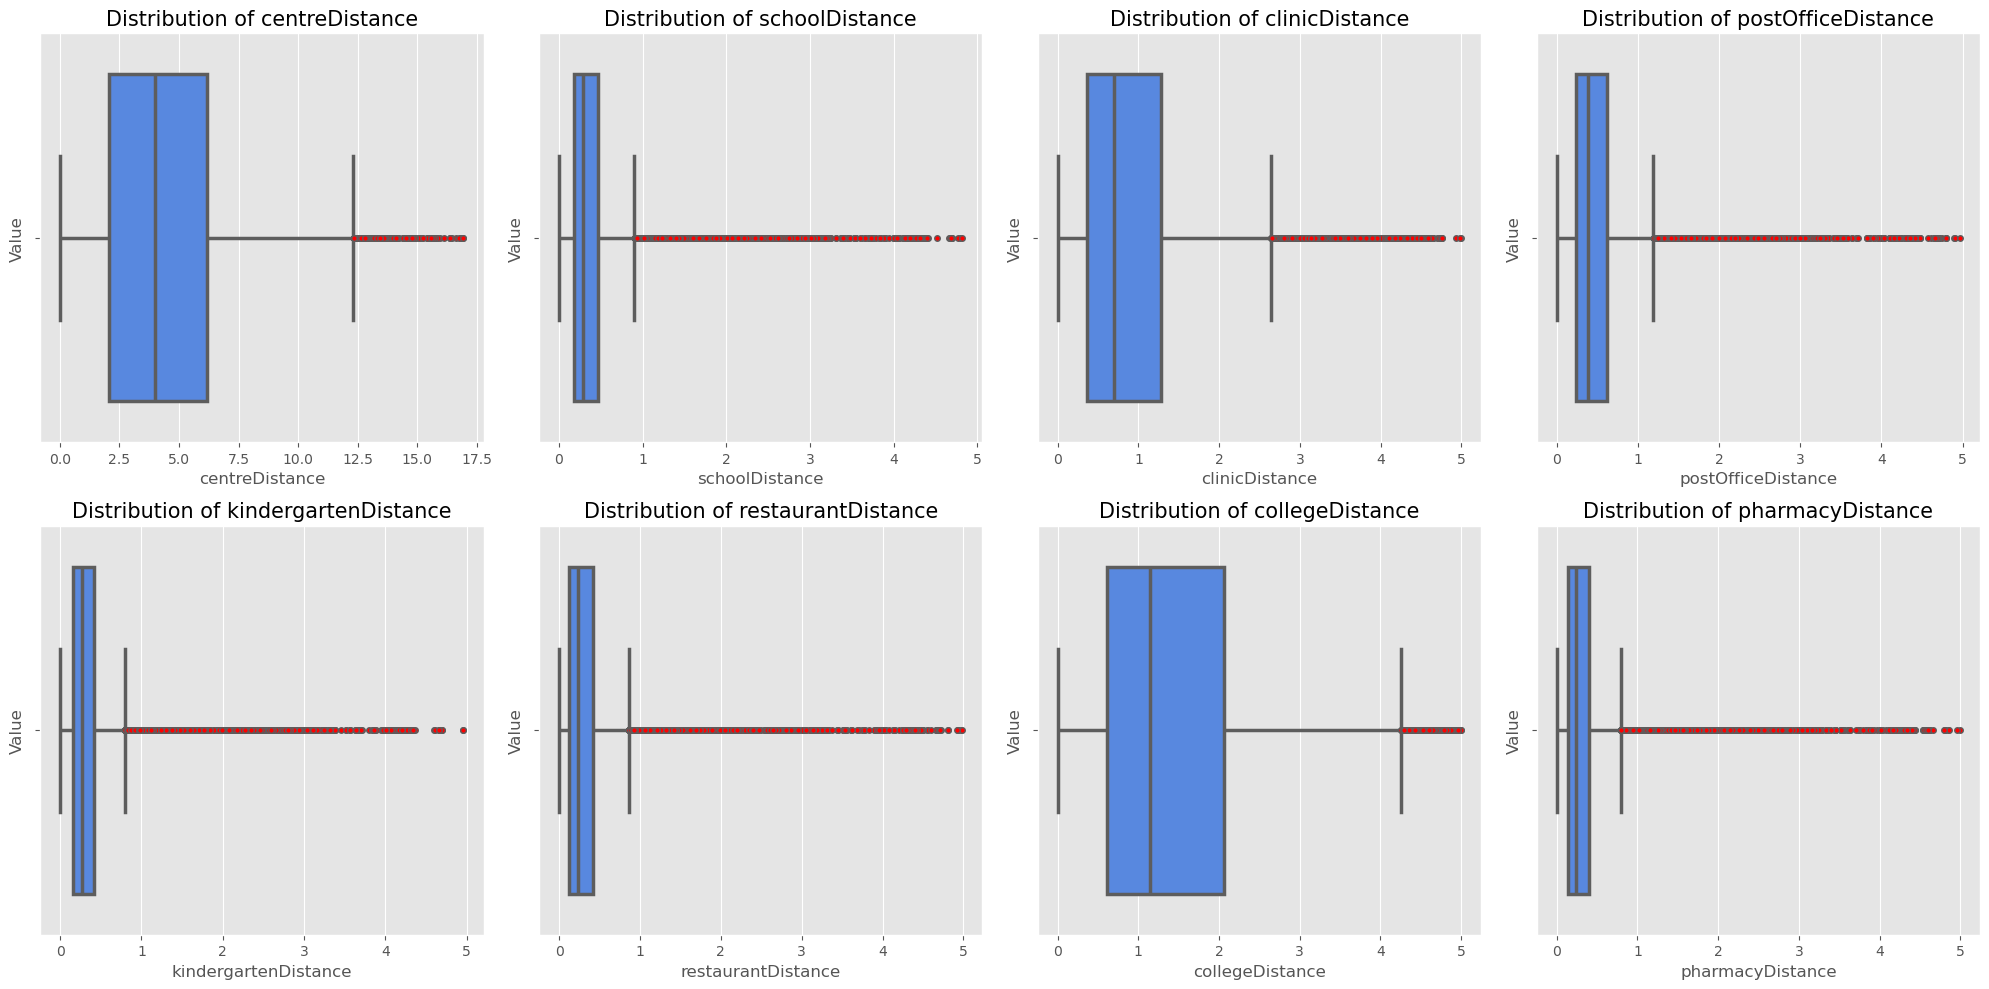

In [224]:
#check distributions of 'Distance' variables
distance_columns = [col for col in house_data.columns if col.endswith('Distance')]

fig, ax = plt.subplots(2,4,figsize=(20,10))
ax = ax.flatten()

for i, col in enumerate(distance_columns):
    sns.boxplot(x=house_data[col], ax=ax[i], color='#4281f5',linewidth=2.5, flierprops=dict(markerfacecolor='red', marker='o', markersize=4))
    ax[i].set_title(f'Distribution of {col}', fontsize=15)
    ax[i].set_xlabel(col, fontsize=12)
    ax[i].set_ylabel('Value', fontsize=12)


plt.tight_layout()
plt.show()

There are lots of outliers but no abnormal distance values. Random Forest handles outliers well so there's no need to get rid of them.

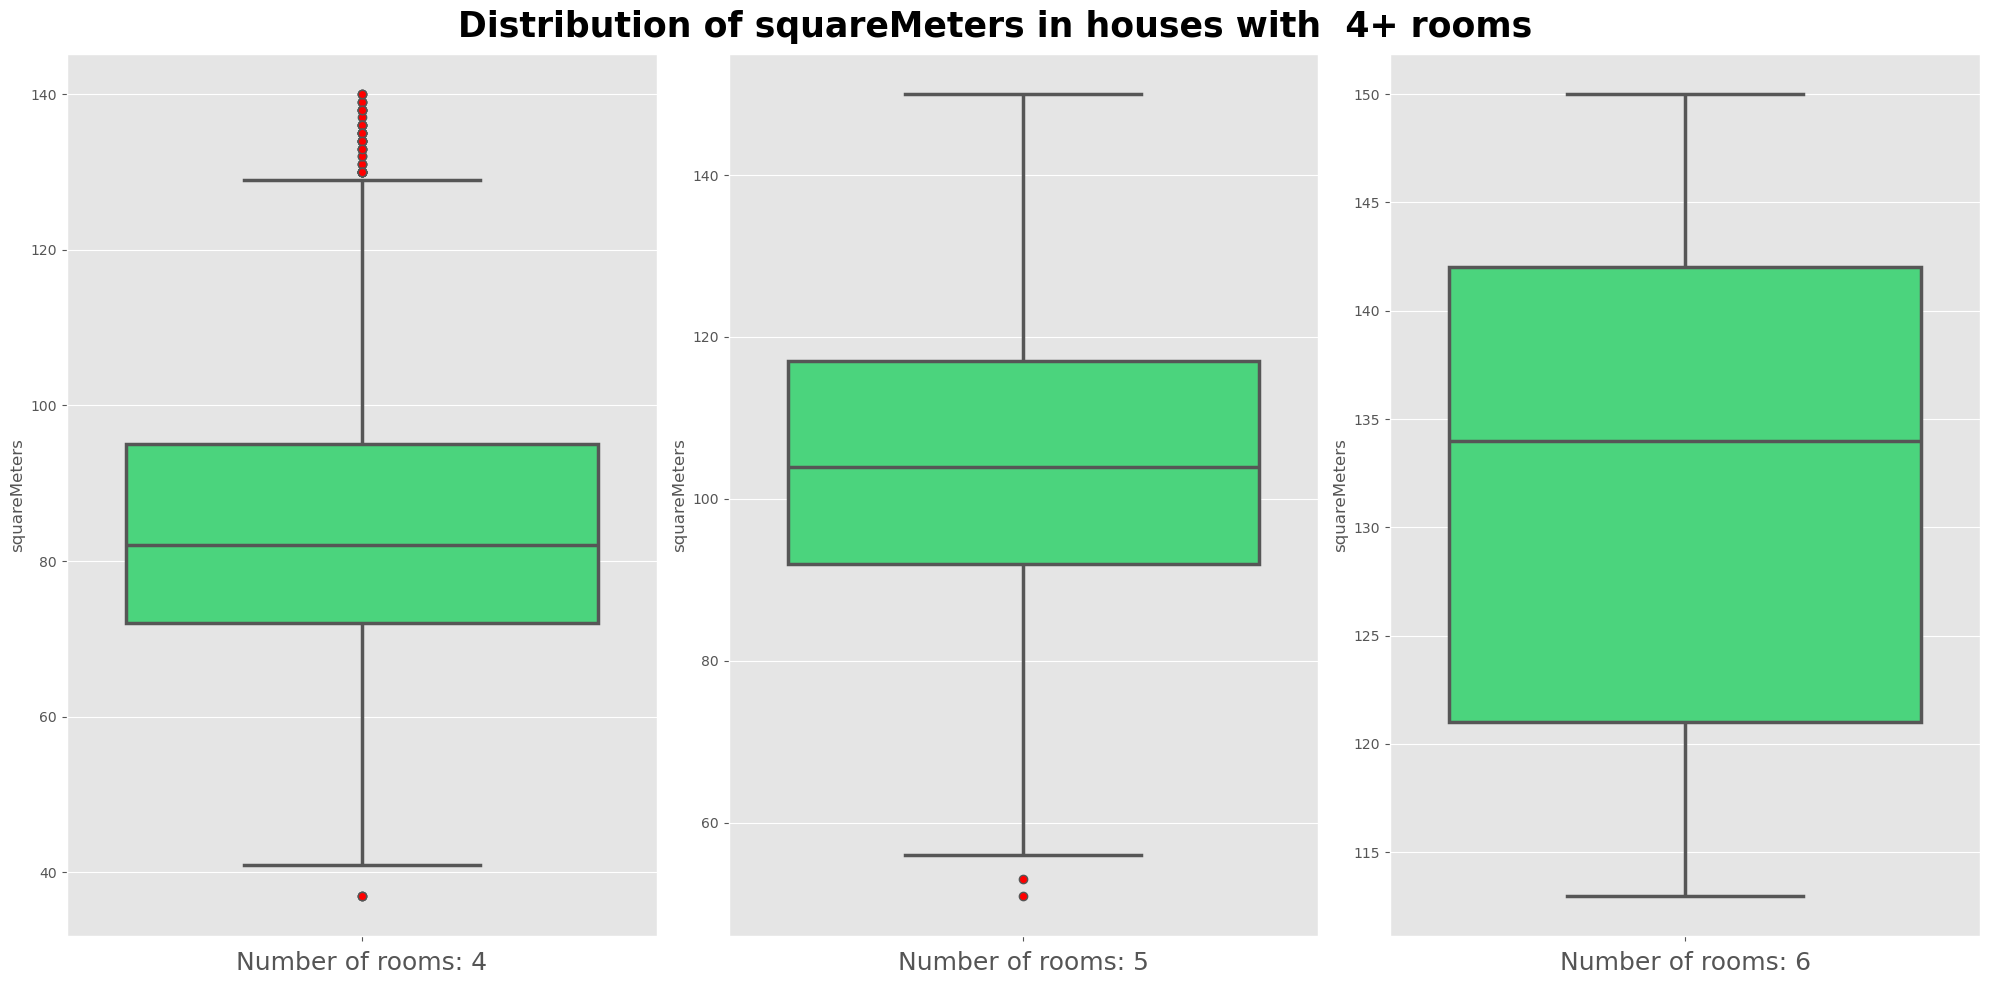

In [228]:
#check for rows with high number of rooms and check squaremeters.
room_data = house_data[house_data['rooms']>=4][['rooms','squareMeters']]


n_rooms = room_data['rooms'].value_counts().index

fig, ax = plt.subplots(1,3,figsize=(20,10))
ax = ax.flatten()

for i, room in enumerate(n_rooms):
    sns.boxplot(room_data[room_data['rooms'] == room]['squareMeters'],ax=ax[i],color='#34eb77',linewidth=2.5,flierprops=dict(markerfacecolor='red', marker='o', markersize=6))
    ax[i].set_xlabel(f'Number of rooms: {round(room)}',fontsize=18)
    
fig.suptitle('Distribution of squareMeters in houses with  4+ rooms',fontsize=25,fontweight='bold')

plt.tight_layout()
plt.show()

No anomalities there.

In [226]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18844 entries, 0 to 18904
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    18844 non-null  object 
 1   squareMeters          18844 non-null  float64
 2   rooms                 18844 non-null  float64
 3   floor                 18844 non-null  float64
 4   floorCount            18844 non-null  float64
 5   buildYear             18844 non-null  float64
 6   latitude              18844 non-null  float64
 7   longitude             18844 non-null  float64
 8   centreDistance        18844 non-null  float64
 9   poiCount              18844 non-null  float64
 10  schoolDistance        18844 non-null  float64
 11  clinicDistance        18844 non-null  float64
 12  postOfficeDistance    18844 non-null  float64
 13  kindergartenDistance  18844 non-null  float64
 14  restaurantDistance    18844 non-null  float64
 15  collegeDistance       18

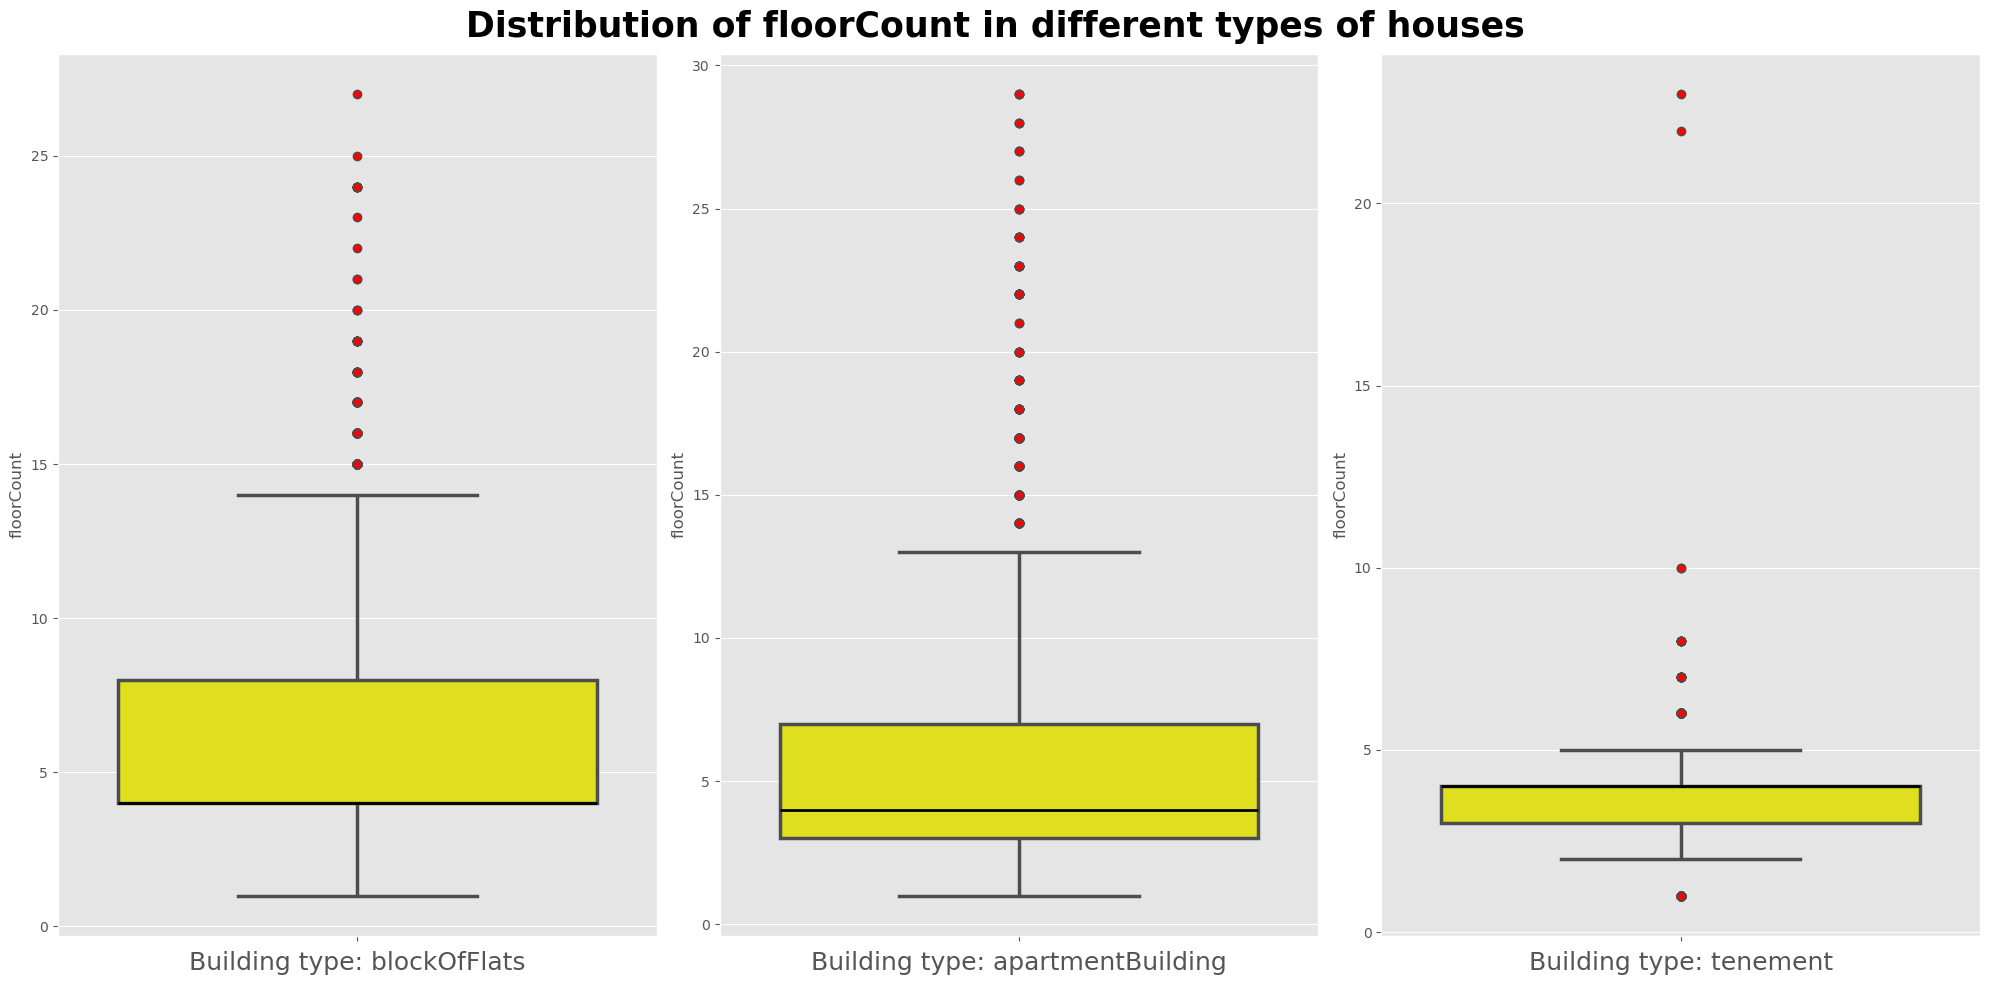

In [227]:
#check floor count in different types of buidlings
floor_count_type = house_data[['type','floorCount']]

floor_to_iter = floor_count_type['type'].value_counts().index
floor_to_iter

fig, ax = plt.subplots(1,3,figsize=(20,10))
ax = ax.flatten()

for i, b_type in enumerate(floor_to_iter):
    sns.boxplot(floor_count_type[floor_count_type['type'] == b_type]['floorCount'],ax=ax[i],color='yellow',linewidth=2.5,flierprops=dict(markerfacecolor='red', marker='o', markersize=6)
               ,medianprops=dict(color="black", linewidth=2))
    ax[i].set_xlabel(f'Building type: {b_type}',fontsize=18)
    
fig.suptitle('Distribution of floorCount in different types of houses',fontsize=25,fontweight='bold')

plt.tight_layout()
plt.show()

It is very unlikely for a tenement to be over 6 stories high. 

Because of this I will change the tenements with 10+ floorCount to 'blockOfFlats' because that is the most likely type of building for that number of stories and it is more similar to a tenement rather than an apartment building.

In [233]:
#convert 10+ floor tenements to blockOfFlats
tenement_over10_floor = house_data[(house_data['floorCount']>=10) & (house_data['type'] =='tenement')].index
house_data.loc[tenement_over10_floor,'type'] = 'blockOfFlats'

<a id="random-forest"></a>
# 2. Decision Tree and Random Forest

In [234]:
#drop id variable and convert to numerical values: type, city and ownership

house_data.drop('id',axis=1,inplace=True)

house_data['type_numerical'] = pd.factorize(house_data['type'])[0]
house_data['city_numerical'] = pd.factorize(house_data['city'])[0]
house_data['ownership_numerical'] = pd.factorize(house_data['ownership'])[0]

First, let's see how a single decision tree does on the dataset


In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(house_data.drop(['price','type','city','ownership'],axis=1),
                                                    house_data['price'], test_size=0.3
                                                    ,random_state=42)

In [82]:
#single decision tree
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [83]:
pred = dtree.predict(X_test)

In [156]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

#evaluation
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = mean_squared_error(y_test, pred, squared=False)
r2 = r2_score(y_test, pred)
mape = mean_absolute_percentage_error(y_test, pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'MAPE: {mape}')
print(f'RMSE: {rmse}')
print(f'R-squared (R^2): {r2}')

MAE: 113523.27490861928
MSE: 33704965311.955215
MAPE: 0.1594257030965346
RMSE: 183589.12089760444
R-squared (R^2): 0.7053725738534281


We got a 0.71 R-squared which is still a decent score for a single decision tree.

Now, let's see how a Random Forest does.

In [86]:
from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestRegressor()
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

In [154]:
mae = mean_absolute_error(y_test, rfc_pred)
mse = mean_squared_error(y_test, rfc_pred)
rmse = mean_squared_error(y_test, rfc_pred, squared=False)
r2 = r2_score(y_test, rfc_pred)
mape = mean_absolute_percentage_error(y_test, rfc_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'MAPE: {mape}')
print(f'RMSE: {rmse}')
print(f'R-squared (R^2): {r2}')

MAE: 81950.88131207995
MSE: 15767247606.230042
MAPE: 0.11688737150766611
RMSE: 125567.70128592002
R-squared (R^2): 0.8621727233170746


In [98]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [100]:
#do randomized CV search to get a sense of the best parameters

param_grid = {'min_samples_split' : [2, 5, 10, 15, 20], 'n_estimators' : [100, 200, 300, 500], 'max_depth': [10, 15, 20, 25, None],
             'min_samples_leaf': [1, 5, 10, 15],'max_features': ['auto', 'sqrt'],'bootstrap': [True, False]}
grid_rf = RandomizedSearchCV(RandomForestRegressor(), param_grid, refit=True, verbose = 3,n_jobs=-1)
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [113]:
grid_rf.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25,
 'bootstrap': False}

In [106]:
param_grid_final = {'n_estimators': [300,400,500],
 'min_samples_split': [2,10],
 'min_samples_leaf': [1,5,15],
 'max_features': ['sqrt'],
 'max_depth': [15,25,30],
 'bootstrap':[True,False]}

grid_final = GridSearchCV(RandomForestRegressor(),param_grid_final,refit=True,verbose=3)
grid_final.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.839 total time=   7.7s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.842 total time=   7.8s
[CV 3/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.826 total time=   7.8s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.850 total time=   7.9s
[CV 5/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.837 total time=   7.8s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=0.838 total time=  10.6s
[CV 2/5] END bootst

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [15, 25, 30],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 5, 15],
                         'min_samples_split': [2, 10],
                         'n_estimators': [300, 400, 500]},
             verbose=3)

In [111]:
#final Random Forest model
best_params = grid_final.best_params_

final_model = RandomForestRegressor(**best_params)
final_model.fit(X_train,y_train)

final_model_predict = final_model.predict(X_test)

In [150]:
#Evaluation of the Random Forest after grid search
mae = mean_absolute_error(y_test, final_model_predict)
mse = mean_squared_error(y_test, final_model_predict)
rmse = mean_squared_error(y_test, final_model_predict, squared=False)
r2 = r2_score(y_test, final_model_predict)
mape = mean_absolute_percentage_error(y_test, final_model_predict)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'MAPE: {mape}')
print(f'RMSE: {rmse}')
print(f'R-squared (R^2): {r2}')

MAE: 81276.4821461259
MSE: 15339333446.601847
MAPE: 0.11830057511074395
RMSE: 123852.06274665694
R-squared (R^2): 0.865913277454901


After CV grid search we get a small improvement in our model which means that the 'default' Random Forest model already did well in predicting house prices.

In [235]:
importance_dt = final_model.feature_importances_

feature_dt = pd.DataFrame({
    'Feature' : house_data.drop(['type','ownership','price','city'],axis=1).columns,
    'Importance' : importance_dt
}).sort_values(by='Importance',ascending=False)
feature_dt.head()

,Feature,Importance
0,squareMeters,0.267540
22,city_numerical,0.106683
1,rooms,0.096271
4,buildYear,0.079167
6,longitude,0.075151


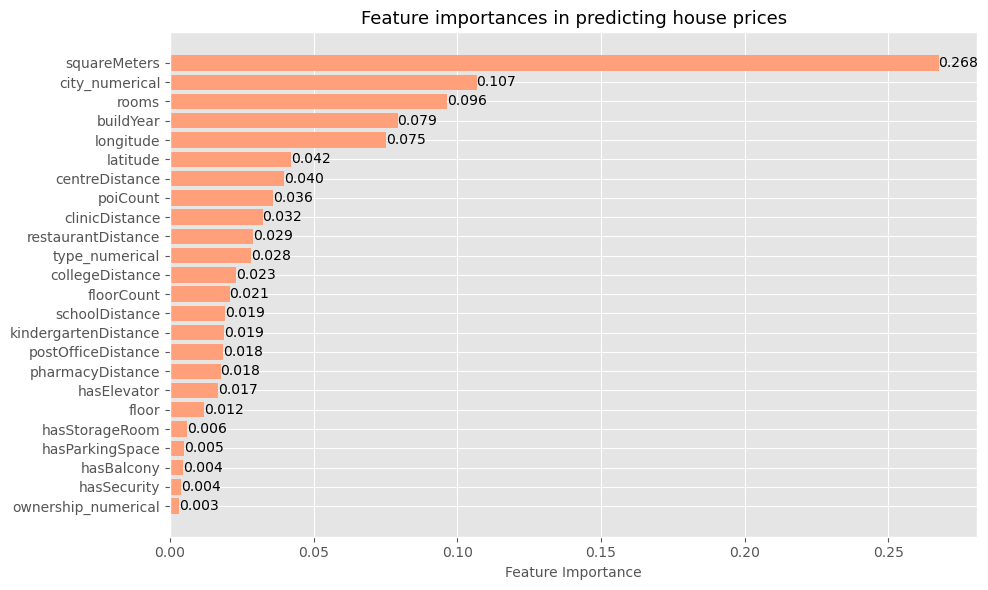

In [238]:
feature_names = house_data.drop(['type','ownership','price','city'],axis=1).columns

#sort features
sorted_i = np.argsort(importance_dt)
sorted_feature_names = feature_names[sorted_i]
sorted_importances = importance_dt[sorted_i]

plt.figure(figsize=(10, 6))

plt.barh(sorted_feature_names, sorted_importances, color='#FFA07A')
plt.xlabel("Feature Importance", fontsize=10)
plt.title("Feature importances in predicting house prices",fontsize=13)

#add importance value to the bars
for index, value in enumerate(sorted_importances):
    plt.text(value, index, f"{value:.3f}", va='center')

plt.tight_layout()
plt.show()

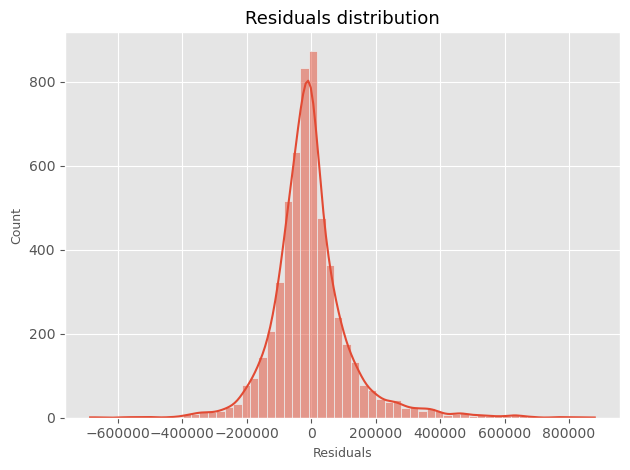

In [239]:
residuals = y_test - final_model_predict

#see residuals of the predictions

sns.histplot(residuals, kde=True,bins=60)
plt.xlabel("Residuals",fontsize=9)
plt.ylabel('Count',fontsize=9)
plt.title("Residuals distribution",fontsize=13)

plt.tight_layout()
plt.show()

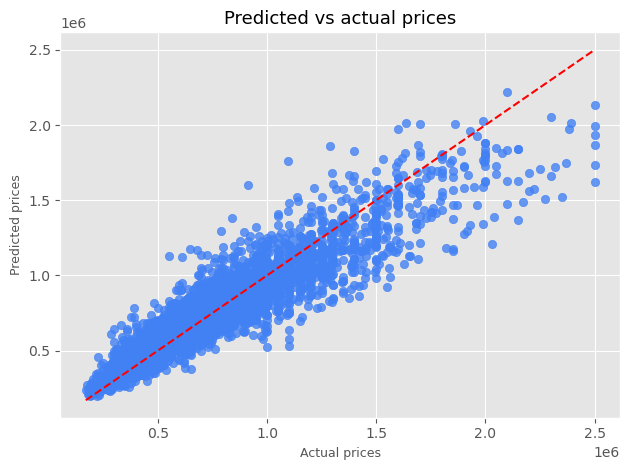

In [191]:
#scatter plot to see how well the model predicts prices

plt.scatter(y_test, final_model_predict, color= '#4281f5',alpha=0.8)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual prices",fontsize=9)
plt.ylabel("Predicted prices",fontsize=9)
plt.title("Predicted vs actual prices",fontsize=13)

plt.tight_layout()
plt.show()

<a id="conclusions"></a>
# 3. Conclusions



After cleaning the data, training the Random Forest Regression model and evaluating it's performance we got the following:

* R-squared value: **0.866**, which means that the model explains *86.6% of variance* in the dataset.
* Mean absolute percentage error: **11.83%**, which means that the model is wrong by *11.83 percent* on average when predicting house prices. It indicates reasonably strong predictive accuracy for practical use.
* The most important features when predicting house prices in Poland are: **square meters, city, build year and longitude/latitude**

Although there is some room for improvement, the model does well in predicting house prices in Poland and could be a useful tool for homebuyers.

Future improvements could involve testing additional models or hyperparameter tuning to enhance performance.